In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 8]
matplotlib.rcParams.update({'font.size': 16})
import math
import bitstruct.c as bitstruct

In [2]:
def getDataRaw(fnames):
    data = []
    data_format=bitstruct.compile("p8s18p3p3"*(1025*8)+"u64"*(1025))
    swapformat="4"*(1025*8)+"8"*(1025)
    for fname in fnames:
        print(fname)
        with open(fname, "rb") as f:
            line = f.read(1025*10*4+1)
            while len(line) == 1025*10*4+1:
                data.extend(data_format.unpack(bitstruct.byteswap(swapformat, line)))
                #data.extend(data_format.unpack(line))
                line = f.read(1025*10*4+1)
    data = np.array(data)
    return data.reshape([-1, 9, 1025])

In [3]:
data = getDataRaw(["data_0.dat"])

data_0.dat


data_0.dat


/tmp/ipykernel_9505/1872610659.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


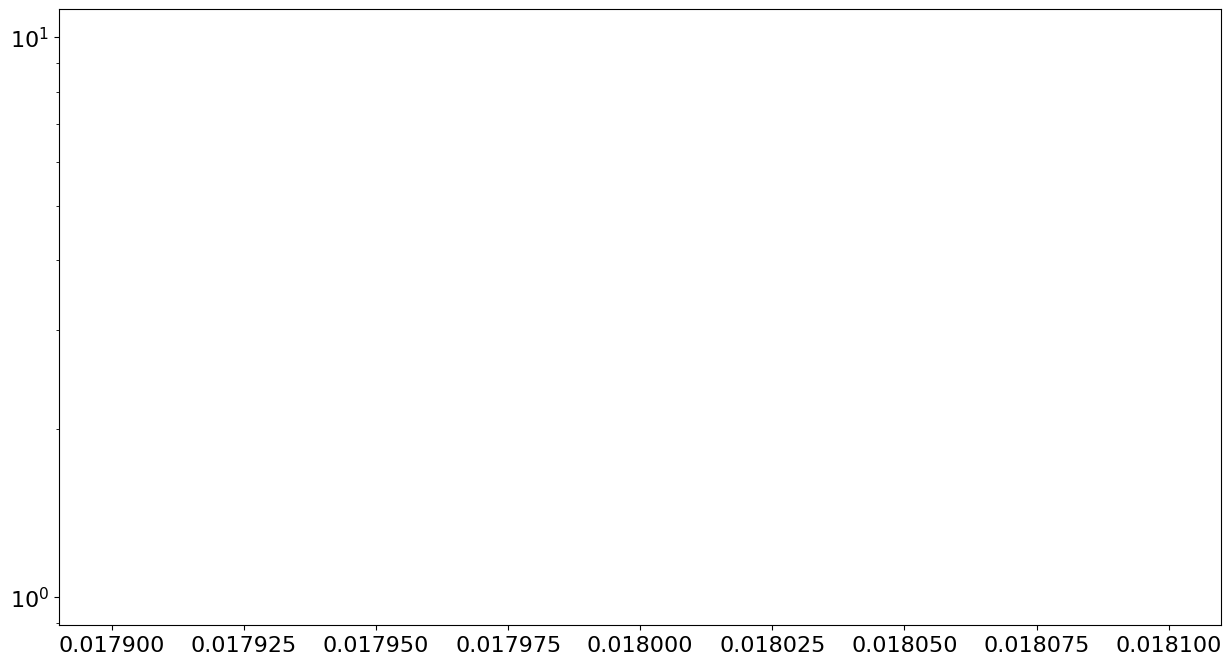

In [4]:
data = getDataRaw(["data_0.dat"])
flat_data = data[:,:,1:].reshape([-1, 9, int(1024/8), 8])[:,8,0:,1].flatten()*60/1000000
dt = flat_data[1:]-flat_data[:-1]
#dt = dt[4140000:4200000]
plt.hist(dt,bins=np.linspace(0.0179, 0.0181, 100))#dt.max(), 100))
plt.yscale("log")
#plt.plot(dt)
#plt.plot(flat_data)

data_0.dat
data_0_linearPS_3.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(2000, 128)


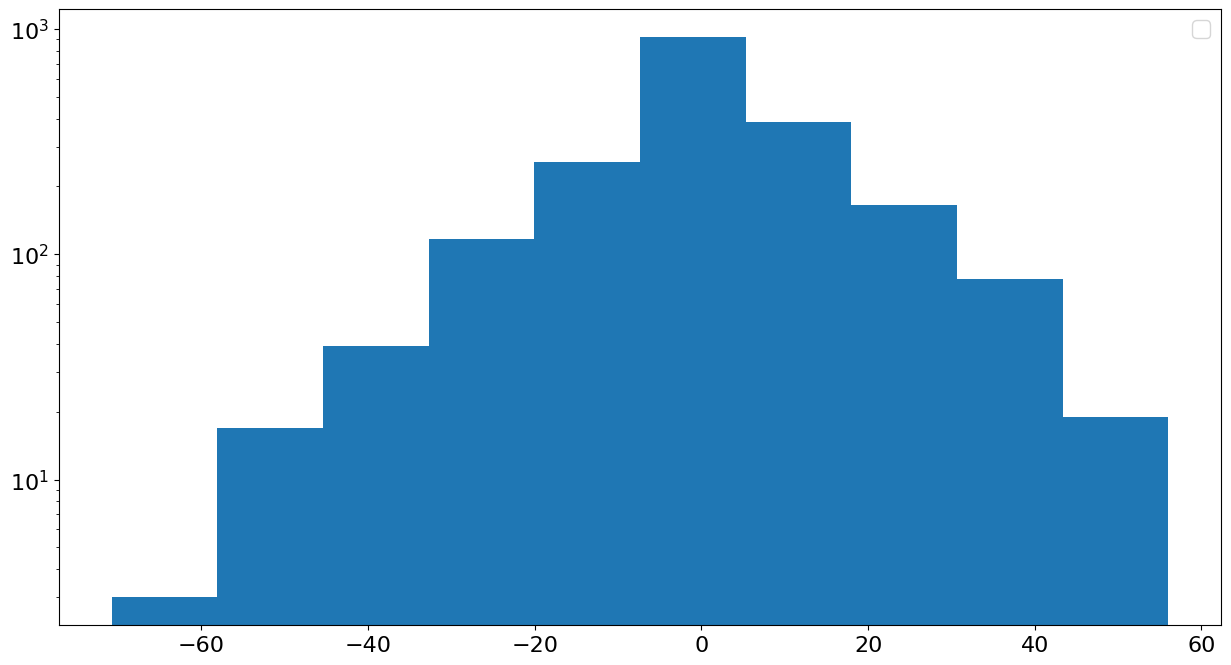

In [37]:
event = slice(None)
subevent = slice(None)

plt.clf()
data1 = getDataRaw(["data_0.dat"])
data2 = getDataRaw(["data_0_linearPS_3.dat"])
for label, data in [("shielded", data1),]:# ("unshielded", data2)]:
    rdata=data[:,:,1:].reshape([-1, 9, int(1024/8), 8])
    for chip in [0]:
        for channel in [0]:
            time = rdata[event,8,subevent,channel].flatten()#*60/1000000
            ydata = rdata[event,chip,subevent,channel]#.flatten()#*5/(2**18)
            print(ydata.shape)
            ##ydata = ydata[(ydata > 100000) | (ydata < -100000)]
            #cut = ydata > 100000
            ##ydata[cut] = ((~ydata[cut]) & 0x1fff)
            #cut2 = ydata < -100000
            ##ydata[cut2] = -(ydata[cut2] & 0x1fff)
            ydata=ydata*10000/(2**18)

            #ydata = ydata[(cut | cut2)]

            #ydata = ydata.flatten()
            ydata = ydata.mean(axis=1)

            #plt.scatter(time,ydata, label=label)

            N = len(ydata)
            T = 0.00001368
            #yf = fft(ydata)
            #xf = fftfreq(N, T)[:N//2]
            #plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label=label)

            plt.hist(ydata)#, bins=np.linspace(0, 4, 51), histtype=u'step', label=label)
            #plt.hist(time[1:]-time[:-1], bins=np.linspace(225, 230, 201), histtype=u'step', label=label)

plt.legend()
#plt.axhline(y = 0, color = 'r', linestyle = '-')
#plt.axvline(x=60, color = 'r', linestyle = '-')
#plt.ylim(-0.02, 0.02)
#plt.xlabel("Volts [mV]")
#plt.xlabel("time [ms]")
plt.yscale("log")

In [6]:
for i in rdata[1,:-1,1,:]:
    print(i)

[ 51  15  20   4  24  20  44 131]
[36 16 36 14 31 27 47 93]
[ 33  11  26   4  22  29  49 158]
[    34     26     28     17     16 -11164  32219  24215]
[43 21 31 20 59 35 49 55]
[50 40 47 29 49 32 38 55]
[39 38 37 19 42 36 46 62]
[   44    41    32    25    34 -5112 34169 12968]


In [234]:
time[:,]

array([-40., -39., -38., -37., -36., -35., -34., -33., -32., -31., -30.,
       -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
        -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.])